In [12]:
from fastai2.vision.all import *

In [13]:
storage_path = Path('/storage')
data_path = storage_path/'Columbia Gaze Data Set'
#lbl_path = storage_path/'lr_short_20.csv'
#lbl_path = storage_path/'lr_with_center.csv'
lbl_path = storage_path/'lr_hard_center.csv'

# Load labels

In [14]:
df = pd.read_csv(lbl_path)
df.head()

,path,target,is_valid
0,/storage/Columbia Gaze Data Set/0016/0016_2m_0P_10V_10H.jpg,Right,False
1,/storage/Columbia Gaze Data Set/0016/0016_2m_15P_10V_-10H.jpg,Left,False
2,/storage/Columbia Gaze Data Set/0016/0016_2m_-30P_10V_-15H.jpg,Left,False
3,/storage/Columbia Gaze Data Set/0016/0016_2m_15P_0V_10H.jpg,Right,False
4,/storage/Columbia Gaze Data Set/0016/0016_2m_-15P_0V_15H.jpg,Right,False


In [15]:
df.is_valid.value_counts()

False    3450
True      750
Name: is_valid, dtype: int64

In [16]:
df.target.value_counts()

Left       1680
Right      1680
HCenter     840
Name: target, dtype: int64

# Dataloaders

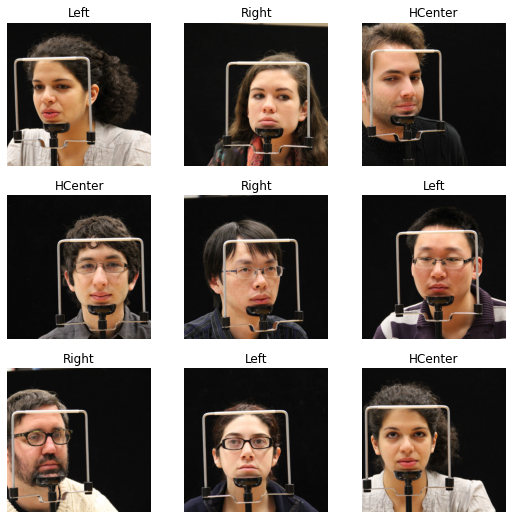

In [22]:
dls = ImageDataLoaders.from_df(df, Path('/'), valid_col='is_valid',
                               item_tfms=Resize(512), batch_size=64, val_bs = 64)
dls.show_batch()

# Model init + finding learning rate

# Exporting

In [32]:
dls = ImageDataLoaders.from_df(df, Path('/'), valid_col='is_valid',
                               item_tfms=Resize(512), batch_size=64, val_bs = 64, num_workers=0)

In [33]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [34]:
learn.export(storage_path/'num_workers0.pkl')

In [30]:
learn??

(1.58489319801447e-07, 2.5118865210060903e-07)

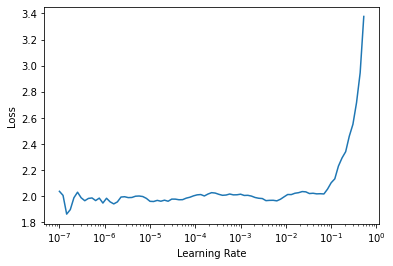

In [33]:
learn.lr_find()

In [34]:
learn.fine_tune(6, base_lr=5e-2)
learn.export(storage_path/'lr_hard_center_resnet34_512_6epochs.pkl')

epoch,train_loss,valid_loss,accuracy,time
0,2.114461,1.524223,0.357333,04:10


epoch,train_loss,valid_loss,accuracy,time
0,1.163065,13.058287,0.405333,04:13
1,0.644014,10.113030,0.438667,04:40
2,0.394226,0.738336,0.820000,04:27
3,0.199520,0.468313,0.856000,04:33
4,0.099881,0.283883,0.906667,04:34
5,0.048760,0.135352,0.961333,04:36


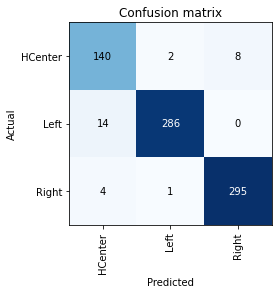

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [6]:
dls = ImageDataLoaders.from_df(df, '/', valid_col='is_valid',
                               item_tfms=Resize(1024), batch_size=8)

learn = load_learner(storage_path/'lr_hard_center_resnet34_512_6epochs.pkl')

In [7]:
learn.dls = dls

(7.585775847473997e-08, 3.6307804407442745e-07)

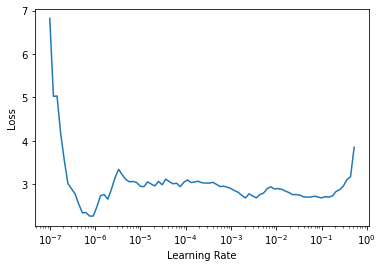

In [38]:
learn.lr_find()

In [ ]:
learn.fine_tune(6, 1e-3)
learn.export(storage_path/'lr_hard_center_resnet34_1024_6epochs.pkl')

epoch,train_loss,valid_loss,accuracy,time


# Interpretation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(9, largest=True)